**Table of contents**    
  - Libraries    
  - Loading and cleaning the data    
    - Fixing column names    
  - Preparing the data for modeling    
    - Correlation    
    - Dropping columns    
    - Relationship between independent variables and the target variable    
    - Data partition    
    - Scaling the data    
  - First logistic regression model    
    - Model output    
    - VIF indicator    
    - Test set prediction    
    - Classification report    
  - Second logistic regression model (with ADASYN oversampling)    
    - Target variable proportion    
    - Adasyn oversampling    
    - Model formula    
    - Test set prediction    
    - Classification report    
  - kNN classification (without oversampling)    
    - Best paramaters    
    - Test set prediction    
  - kNN classification (with ADASYN oversampling)    
    - Best parameters    
    - Prediction    
    - Confusion matrix    
  - Summary and conclusion      

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=1
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## Libraries

In [719]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_breast_cancer
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## Loading and cleaning the data

In [720]:
df = load_breast_cancer(as_frame=True)

In [721]:
df = df.frame

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [723]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [724]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

### Fixing column names

In [725]:
df.columns = [col.replace(' ','_') for col in df.columns]

In [726]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

## Preparing the data for modeling

### Correlation

In [727]:
df.corr().round(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
mean_radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01,-0.73
mean_texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12,-0.42
mean_perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05,-0.74
mean_area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00,-0.71
mean_smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50,-0.36
mean_compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69,-0.60
mean_concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51,-0.70
mean_concave_points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37,-0.78
mean_symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44,-0.33
mean_fractal_dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77,0.01


### Dropping columns

#### Columns below were dropped based on the correlation matrix and VIF indicator (computed after creating the model)

In [728]:
df.drop(["mean_area","worst_radius","worst_perimeter","worst_area",
         "worst_texture","mean_concavity","concave_points_error",
         "worst_concave_points","worst_concave_points","worst_compactness","radius_error",
         "mean_radius","mean_compactness","worst_concavity",
         "mean_concave_points","perimeter_error","worst_fractal_dimension",
         "worst_smoothness","fractal_dimension_error","texture_error",
         "compactness_error","mean_symmetry","smoothness_error",
         "mean_fractal_dimension","concavity_error"],axis=1,inplace=True)

### Relationship between independent variables and the target variable

#### Boxplots below indicate that patients with cancer exhibit higher medians of following variables:
1) mean_texture
2) mean_perimiter
3) mean_smoothness
4) area_error
5) worst_symmetry

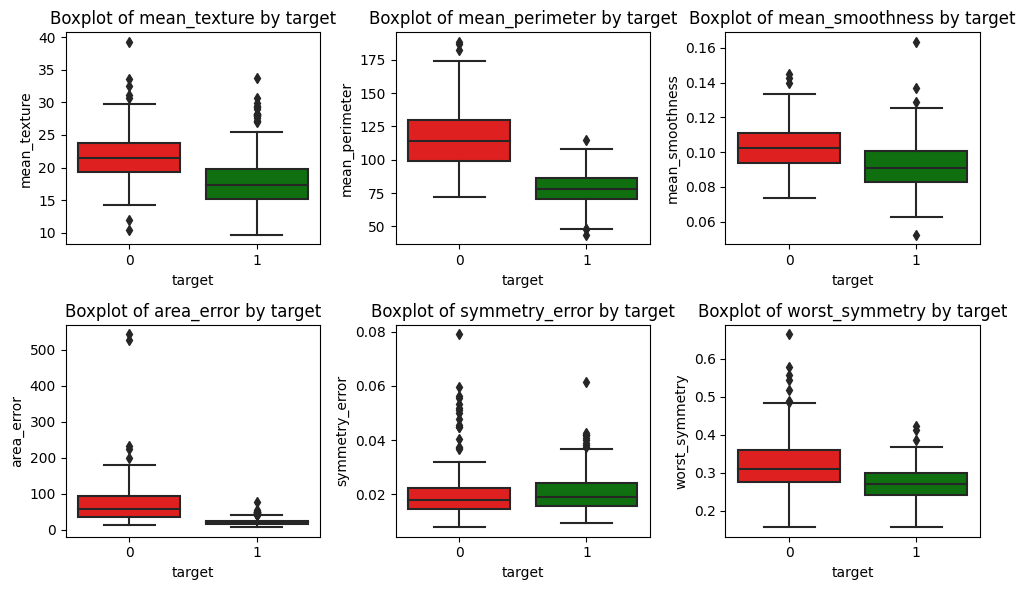

In [729]:
fig,axes = plt.subplots(ncols = 3, nrows = 2, figsize= (10,6))
axes = axes.flatten()

for ind, col in enumerate(df.drop(["target"],axis=1).select_dtypes(np.number).columns.to_list()):
    sns.boxplot(data=df,x="target",y=col,ax =  axes[ind],palette=["red","green"])
    axes[ind].set_title(f"Boxplot of {col} by target")
plt.tight_layout()
plt.show()


### Data partition

In [626]:
X = df.drop(['target'],axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.65,random_state=354)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (369, 6)
X_test: (200, 6)
y_train: (369,)
y_test: (200,)


In [627]:
y_train.unique()

array([0, 1])

### Scaling the data

In [628]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [629]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [630]:
X_train_scaled.index = X_train.index
X_test_scaled.index = X_test.index

In [631]:
y_train

512    0
298    1
93     1
467    1
433    0
      ..
371    1
437    1
551    1
550    1
172    0
Name: target, Length: 369, dtype: int32

## First logistic regresion model

### Model output

In [632]:
model_1 = sm.Logit(y_train,X_train_scaled).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.079601
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  369
Model:                          Logit   Df Residuals:                      363
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.8793
Time:                        16:40:20   Log-Likelihood:                -29.373
converged:                       True   LL-Null:                       -243.40
Covariance Type:            nonrobust   LLR p-value:                 2.647e-90
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
mean_texture       -1.7896      0.460     -3.893      0.000      -2.691      -0.889
mean_perimete

### VIF indicator

In [633]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train_scaled.columns 
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) 
                          for i in range(len(X_train_scaled.columns))] 

In [634]:
vif_data.sort_values("VIF",ascending=False)

,feature,VIF
1,mean_perimeter,2.745082
3,area_error,2.431054
5,worst_symmetry,1.474656
4,symmetry_error,1.382786
2,mean_smoothness,1.233947
0,mean_texture,1.163228


### Test set prediction

In [636]:
preds = model_1.predict(X_test_scaled)

In [637]:
preds = np.where(preds >= 0.5,1,0)

### Classification report

1) Accuracy = 0.95, the model has correctly classified 95% of all observations
2) Precision (0) = 0.96, out of all observations, that were classified by the model as 0, 96% of them were in fact of class 0
3) Recall (sensitivity) (0) = 0.92, the model has correctly classified 92% of 0's
4) Precision (1) = 0.95, out of all observations, that were classified by the model as 1, 95% of them were in fact of class 1
5) Recall (sensitivity) (1) = 0.98, the model has correctly classified 98% of 1's

In [638]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        75
           1       0.95      0.98      0.96       125

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



## Second logistic regression model (with ADASYN oversampling)

### Target variable proportion

In [639]:
y_test.value_counts()

1    125
0     75
Name: target, dtype: int64

### Adasyn oversampling

In [641]:
adasyn = ADASYN(random_state = 123)
X_adasyn,y_adasyn = adasyn.fit_resample(X_train_scaled,y_train)

In [647]:
y_adasyn.value_counts()

0    232
1    232
Name: target, dtype: int64

### Model formula

In [648]:
model_2 = sm.Logit(y_adasyn,X_adasyn).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.130731
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  464
Model:                          Logit   Df Residuals:                      458
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.8114
Time:                        16:58:10   Log-Likelihood:                -60.659
converged:                       True   LL-Null:                       -321.62
Covariance Type:            nonrobust   LLR p-value:                1.478e-110
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
mean_texture       -2.1336      0.362     -5.898      0.000      -2.843      -1.425
mean_perimete

### Test set prediction

In [651]:
preds_adasyn = np.where(model_2.predict(X_test_scaled) >= 0.5,1,0)

### Classification report

In [652]:
print(classification_report(y_true = y_test, y_pred = preds_adasyn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.96      0.96      0.96       125

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



## kNN classification (without oversampling)

In [676]:
knn_reg = KNeighborsClassifier(n_neighbors=3)

optimal_search = GridSearchCV(knn_reg,
                             param_grid={"n_neighbors":[3,4,5,6,7,8,9,10,11,12,13,14,15,16]},
                             cv=4,
                             scoring = "neg_mean_absolute_error")

optimal_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16]},
             scoring='neg_mean_absolute_error')

### Best paramaters

In [681]:
print(optimal_search.best_params_)
print(optimal_search.best_score_)

{'n_neighbors': 7}
-0.03792660121552127


### Test set prediction

In [685]:
kNN_class_7_neighbors = KNeighborsClassifier(n_neighbors=7)
kNN_class_7_neighbors.fit(X_train_scaled,y_train)
kNN_class_7_neighbors = kNN_class_7_neighbors.predict(X_test_scaled)

In [687]:
kNN_preds = kNN_class_7_neighbors

In [688]:
print(classification_report(y_true = y_test, y_pred = kNN_preds))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        75
           1       0.92      1.00      0.96       125

    accuracy                           0.94       200
   macro avg       0.96      0.93      0.94       200
weighted avg       0.95      0.94      0.94       200



## kNN classification (with ADASYN oversampling)

In [693]:
knn_reg = KNeighborsClassifier(n_neighbors=3)

optimal_search = GridSearchCV(knn_reg,
                             param_grid={"n_neighbors":[3,4,5,6,7,8,9,10,11,12,13,14,15,16]},
                             cv=4,
                             scoring = "neg_mean_absolute_error")

optimal_search.fit(X_adasyn,y_adasyn)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16]},
             scoring='neg_mean_absolute_error')

### Best parameters

In [694]:
print(optimal_search.best_params_)
print(optimal_search.best_score_)

{'n_neighbors': 3}
-0.04310344827586207


### Prediction

In [695]:
kNN_class_3_neighbors = KNeighborsClassifier(n_neighbors=3)
kNN_class_3_neighbors.fit(X_adasyn,y_adasyn)
kNN_class_3_neighbors = kNN_class_3_neighbors.predict(X_test_scaled)
kNN_preds = kNN_class_3_neighbors

### Confusion matrix

In [696]:
print(classification_report(y_true = y_test, y_pred = kNN_preds))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        75
           1       0.96      0.90      0.93       125

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



## Summary and conclusion

In [698]:
results = pd.DataFrame({"models":["kNN with oversampling","kNN without oversampling",
"Logistic regression with oversampling","Logistic regression without oversampling"],
"precision_0" : [0.85,1.00,0.93,0.96],
"precision_1":[0.96,0.92,0.96,0.95],
"recall_0":[0.93,0.85,0.93,0.92],
"recall_1":[0.90,1.00,0.96,0.98],
"accuracy_score":[0.92,0.94,0.95,0.95]})

In [701]:
results

,models,precision_0,precision_1,recall_0,recall_1,accuracy_score
0,kNN with oversampling,0.85,0.96,0.93,0.90,0.92
1,kNN without oversampling,1.00,0.92,0.85,1.00,0.94
2,Logistic regression with oversampling,0.93,0.96,0.93,0.96,0.95
3,Logistic regression without oversampling,0.96,0.95,0.92,0.98,0.95


In [704]:
for ind, col in enumerate(results.select_dtypes(np.number).columns.to_list()):
    print(ind,col)

0 precision_0
1 precision_1
2 recall_0
3 recall_1
4 accuracy_score


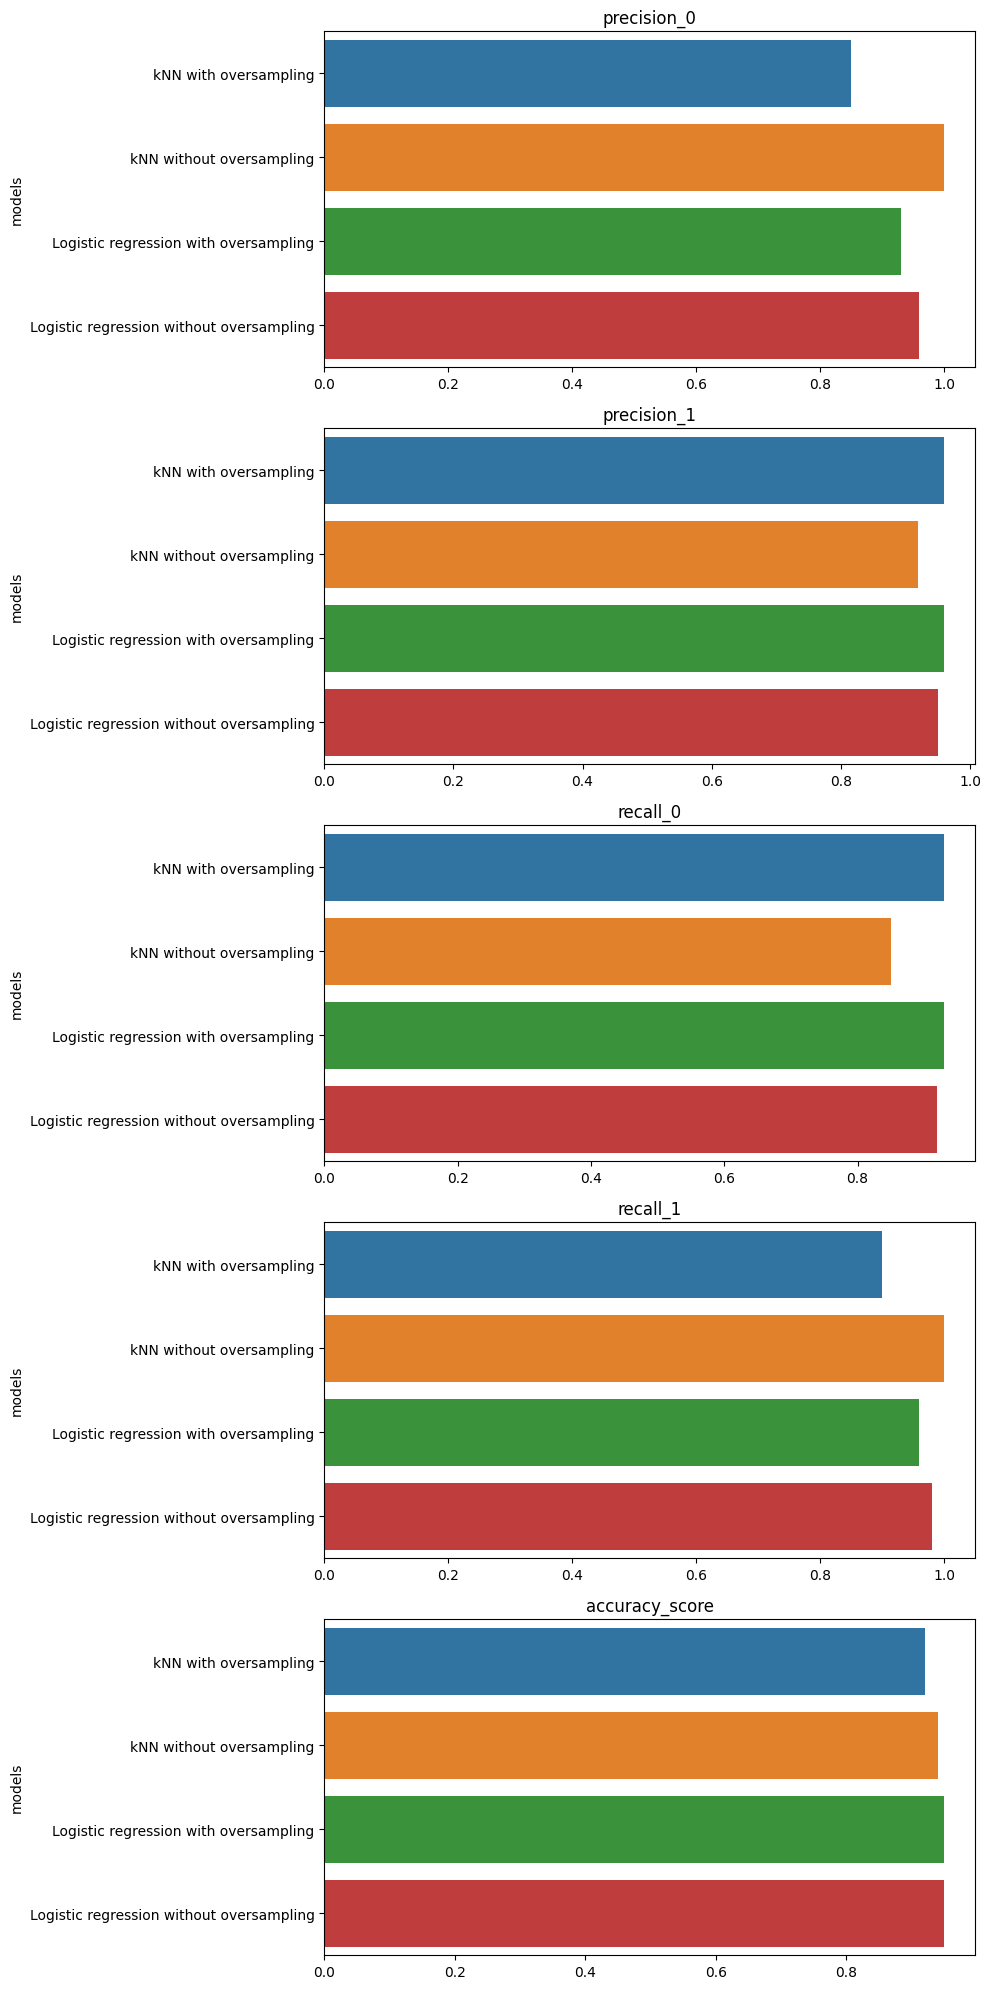

In [712]:
fig, axes = plt.subplots(ncols = 1, nrows = 5, figsize = (10,20))
axes = axes.flatten()

for ind, col in enumerate(results.select_dtypes(np.number).columns.to_list()):
    sns.barplot(data = results, y ="models",x = col, ax= axes[ind])
    axes[ind].set_title(f"{col}")
    axes[ind].set_xlabel("")

plt.tight_layout()
plt.show()


### Conclusion

#### All models exhibit similar results, however, it would be recommended to use logistic regression with ADASYN oversampling, because it's recall for the 0th group amounts to 93%. It means that the model correctly classified 93% patients with cancer (kNN with oversampling gave the same result, but logistic regression with oversampling has higher accuracy score)